# Create a Dual Graph

Create a dual graph representation from a primal graph.

For purposes of visualisation and intuition, it is preferable to work with the network in its dual representation. This way, metrics such as centrality and accessibility are calculated relative to streets instead of intersections. The advantage is that you can then visualise the results on the street network itself. Additionally, angular distances (typically used for Space Syntax) are more intuitive to calculate on the dual graph. That said, nothing stops you from working with the primal graph if you prefer.


In [1]:
from cityseer.tools import graphs, io, plot

First, create a primal graph as before.


INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating 

MultiGraph with 320 nodes and 487 edges


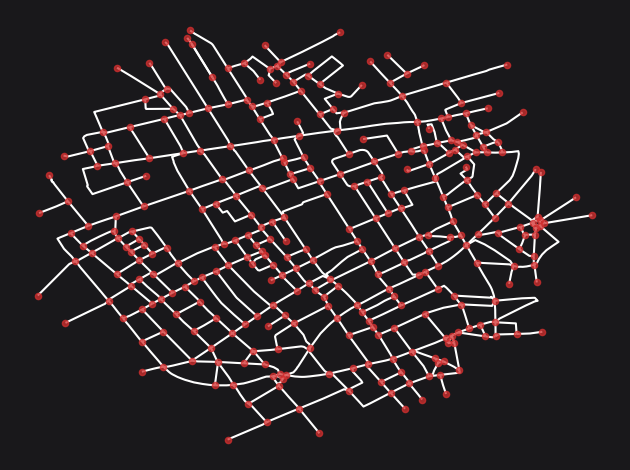

In [2]:
lng, lat = -0.13396079424572427, 51.51371088849723
buffer = 500
poly_wgs, epsg_code = io.buffered_point_poly(lng, lat, buffer)
G = io.osm_graph_from_poly(poly_wgs)
print(G)
plot.plot_nx(G, plot_geoms=True)

A dual graph representation can then be created using the [`nx_to_dual`](https://cityseer.benchmarkurbanism.com/tools/graphs#nx-to-dual) function available from the `cityseer` package's `graphs` module.


In [3]:
G_dual = graphs.nx_to_dual(G)
print(G_dual)

INFO:cityseer.tools.graphs:Converting graph to dual.
INFO:cityseer.tools.graphs:Preparing dual nodes
INFO:cityseer.tools.graphs:Preparing dual edges (splitting and welding geoms)


MultiGraph with 487 nodes and 1151 edges


Notice that the dual graph will have the same number of nodes as the primal graph's number of edges, since the edges have been converted to nodes. The new edges are created by splitting the original edges at their midpoints, and then welding corresponding segments together across intersections. True representations of street geometries are therefore preserved in the dual graph, allowing for accurate calculations of metric distances and angular deviation.


INFO:cityseer.tools.plot:Preparing graph nodes
INFO:cityseer.tools.plot:Preparing graph edges


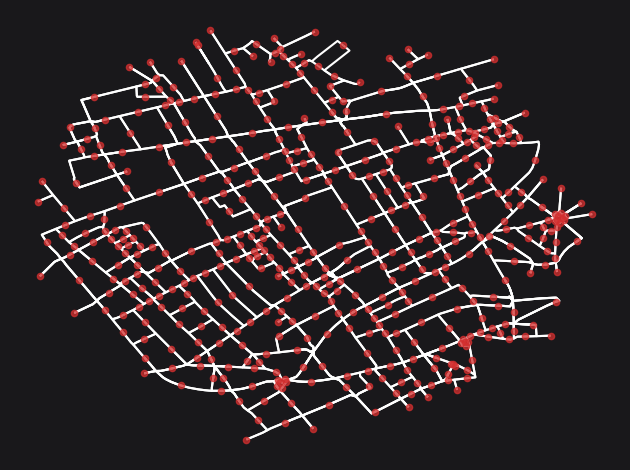

In [4]:
plot.plot_nx(G_dual, plot_geoms=True)